

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with Video





Import Libraries & get url


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Get yesterday variable in bash and format it for url

In [93]:
#date format 'year-mm-dd'
# date -d "2 weeks ago"

yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'

twoDaysAgo = !date -d "2 days ago 13:00 " '+%Y-%m-%d'
oneWeekAgo = !date -d "1 week ago 13:00 " '+%Y-%m-%d'

beginDate = yesterday
print(yesterday, twoDaysAgo, oneWeekAgo)
print(beginDate)
startdate = str(beginDate)[1:-1]
print(startdate)


#hard code option
#startdate = "'2016-12-09'"

['2016-12-21'] ['2016-12-20'] ['2016-12-15']
['2016-12-21']
'2016-12-21'


### get url

In [94]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'// graffiti
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'


url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-21'


In [95]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

## Set Display Column with wider so no problem with Media URL series

In [96]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [97]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## create data frame

In [129]:
df = pd.read_csv(url)

In [130]:
df.shape

(76, 16)

#### wow, 5 days > 1000 reports

In [131]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6651855,12/21/2016 11:37:52 PM,NaN,12/21/2016 11:37:52 PM,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of CHARLES J BRENHAM PL and MCALLISTER ST,6,Civic Center,"(37.7809937749427, -122.413148141072)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585b82c13da153f1b6e8766a/photo_20161221_233738.jpg
1,6651799,12/21/2016 10:38:35 PM,NaN,12/21/2016 11:23:18 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"155 HARRIET ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.777555556659, -122.405097295183)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585b74de3da153f1b6e87605/report.jpg
2,6651632,12/21/2016 08:19:47 PM,NaN,12/21/2016 10:37:50 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1454 15TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766979056778, -122.416956126758)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585b54593da153f1b6e874e4/report.jpg


In [132]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [133]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6651855,2016-12-21 23:37:52,NaT,2016-12-21 23:37:52,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of CHARLES J BRENHAM PL and MCALLISTER ST,6,Civic Center,"(37.7809937749427, -122.413148141072)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585b82c13da153f1b6e8766a/photo_20161221_233738.jpg
1,6651799,2016-12-21 22:38:35,NaT,2016-12-21 23:23:18,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"155 HARRIET ST, SAN FRANCISCO, CA, 94103",6,South of Market,"(37.777555556659, -122.405097295183)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585b74de3da153f1b6e87605/report.jpg
2,6651632,2016-12-21 20:19:47,NaT,2016-12-21 22:37:50,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1454 15TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766979056778, -122.416956126758)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585b54593da153f1b6e874e4/report.jpg


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=21.0, right=21.0
  'left=%s, right=%s') % (left, right))


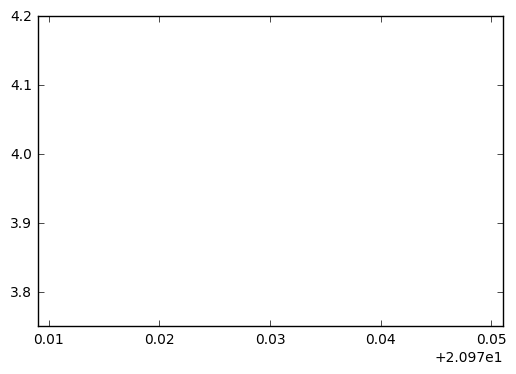

In [134]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=21.0, right=21.0
  'left=%s, right=%s') % (left, right))


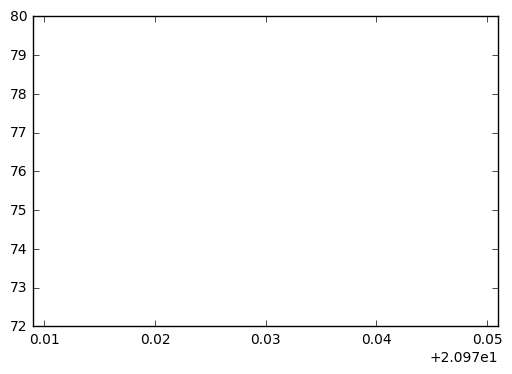

In [135]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


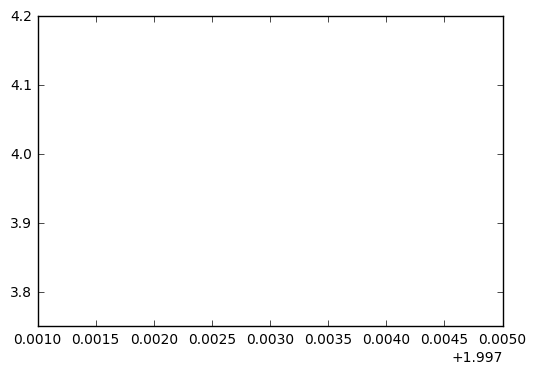

In [136]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [137]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [138]:

df['Request Details'].value_counts()


Encampment Cleanup    76
Name: Request Details, dtype: int64

In [139]:
df['Supervisor District'].value_counts().sort_index()



2      2
3      4
4      1
5      3
6     28
8      7
9     20
10     9
11     2
Name: Supervisor District, dtype: int64

In [140]:
df.Neighborhood.value_counts()

Mission               20
South of Market       19
Civic Center           5
Potrero Hill           4
Duboce Triangle        3
Rincon Hill            3
Produce Market         2
Western Addition       2
Mission Terrace        2
Castro                 2
Showplace Square       2
Financial District     1
Lower Nob Hill         1
Glen Park              1
Apparel City           1
Fisherman's Wharf      1
Bernal Heights         1
Parkside               1
Union Street           1
North Beach            1
Cathedral Hill         1
Pacific Heights        1
Mission Dolores        1
Name: Neighborhood, dtype: int64

In [141]:
dfm= df[df.Neighborhood == 'Mission']


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [142]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']



## limit the data frame to just one neighborhood or just one supervisor district

# Mission

In [167]:
mission = dfm[dfm['Media URL'].notnull()]['Media URL']
mission = mission.reset_index(drop=True)
mission.to_csv('mission.csv')

In [165]:
mission

0                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585b54593da153f1b6e874e4/report.jpg
1                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585b481c3da153f1b6e8740b/report.jpg
2    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b36363da153f1b6e872cf/photo_20161221_180939.jpg
3                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585b1cb83da153f1b6e86ec8/report.jpg
4                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585adac63da153f1b6e8651d/report.jpg
5                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585ada823da153f1b6e86508/report.jpg
6                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585ad9193da153f1b6e864ba/report.jpg
7          http://mobile311.sfgov.org/media/san_francisco/report/photos/585aace13da153f1b6e85c23/20161220_161239.jpg
8                   http://mobile311.sfgov.org/media/san_francis

# Supervisor District

In [123]:

ronan = df[df['Supervisor District']==9]['Media URL']
ronan = ronan.reset_index(drop=True)
print(ronan[:])
ronan.to_csv('ronan.csv')


0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b54593da153f1b6e874e4/report.jpg
1                                                                                                                 NaN
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b481c3da153f1b6e8740b/report.jpg
3                                                                                                                 NaN
4                                                                                                                 NaN
5                                                                                                                 NaN
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/585b36363da153f1b6e872cf/photo_20161221_180939.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b1cb83da153f1b6e86ec8/report.jpg
8                                                       

In [125]:
print(ronan[:])

0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b54593da153f1b6e874e4/report.jpg
1                                                                                                                 NaN
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b481c3da153f1b6e8740b/report.jpg
3                                                                                                                 NaN
4                                                                                                                 NaN
5                                                                                                                 NaN
6     http://mobile311.sfgov.org/media/san_francisco/report/photos/585b36363da153f1b6e872cf/photo_20161221_180939.jpg
7                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b1cb83da153f1b6e86ec8/report.jpg
8                                                       

# The whole City

In [126]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)
print(images[:])


0     http://mobile311.sfgov.org/media/san_francisco/report/photos/585b82c13da153f1b6e8766a/photo_20161221_233738.jpg
1                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b74de3da153f1b6e87605/report.jpg
2                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b54593da153f1b6e874e4/report.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/585b481c3da153f1b6e8740b/report.jpg
4         http://mobile311.sfgov.org/media/san_francisco/report/photos/585b36843da153f1b6e872e6/hole_in_the_fence.jpg
5     http://mobile311.sfgov.org/media/san_francisco/report/photos/585b36363da153f1b6e872cf/photo_20161221_180939.jpg
6                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585b2d243da153f1b6e871ba/unnamed.jpg
7                   http://mobile311.sfgov.org/media/san_francisco/report/photos/585b29423da153f1b6e8715b/unnamed.jpg
8                    http://mobile311.sfgov.org/media/sa

In [117]:
len(images)

44

In [118]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/585b82c13da153f1b6e8766a/photo_20161221_233738.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/585b54593da153f1b6e874e4/report.jpg


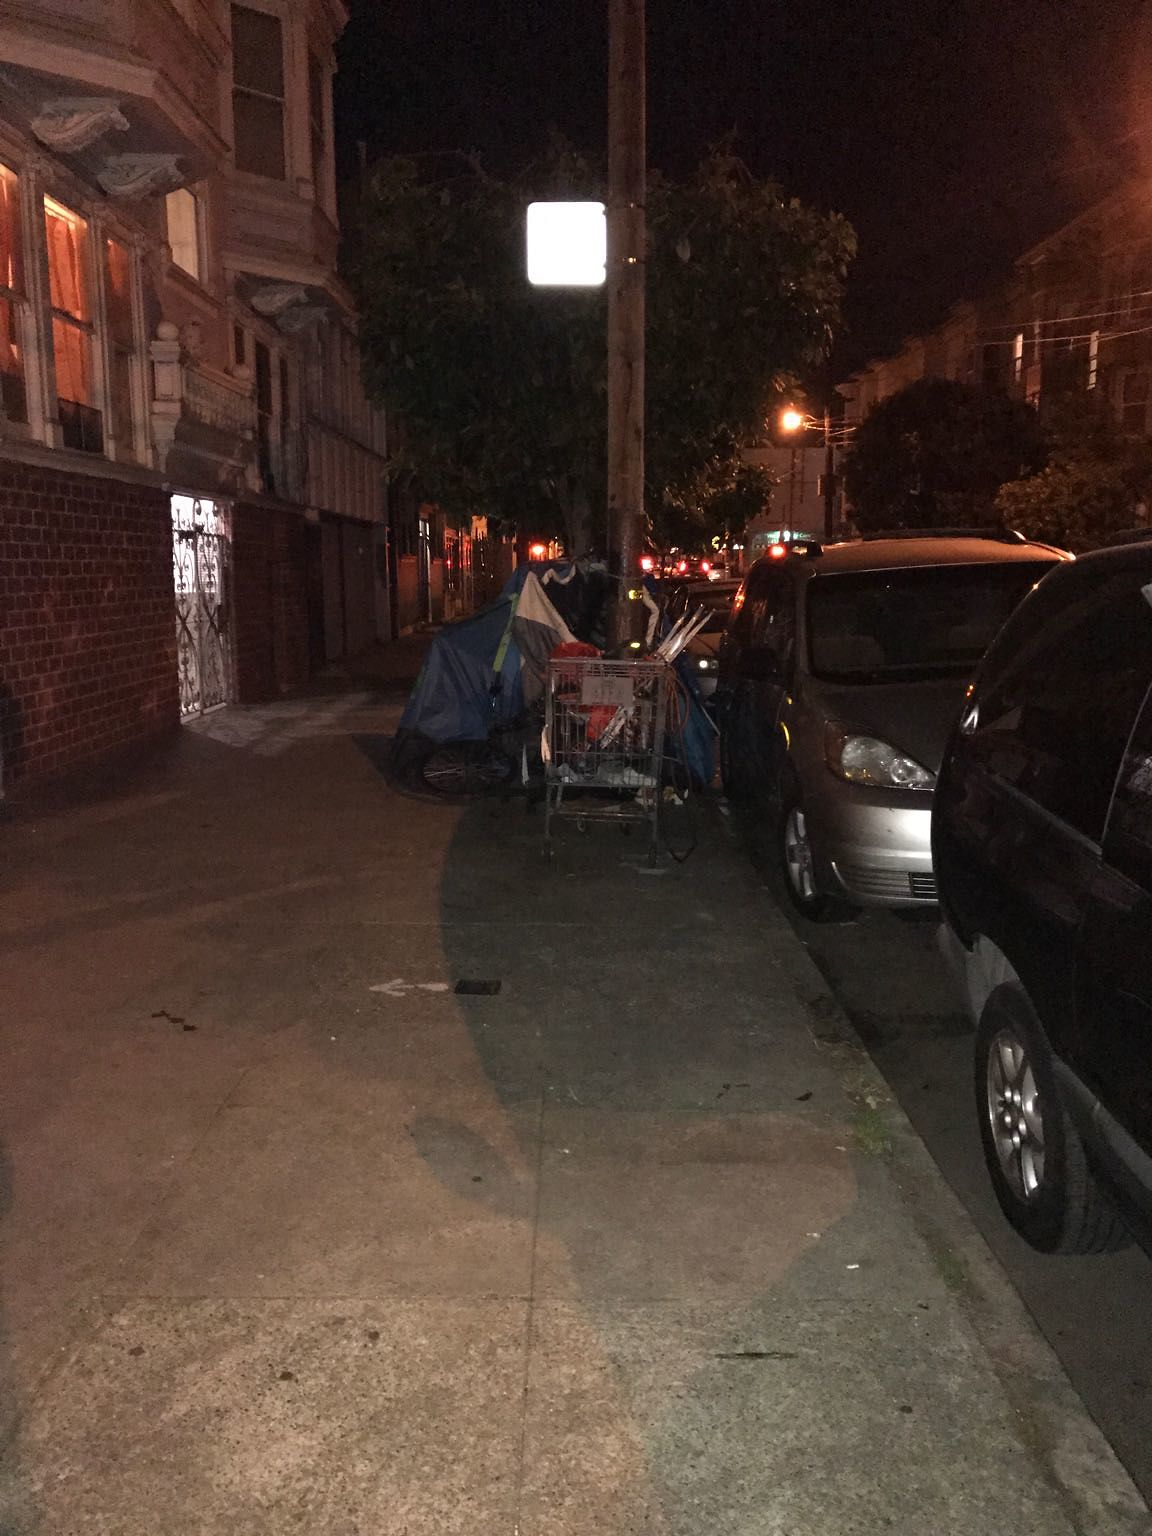

In [119]:
print(images[2])
Image(images[2])


In [120]:
!pwd

/home/gdillon/JupyterPractice/homeless_SF311


In [121]:
images[:1000].to_csv("./imagelist.txt", index=False)

In [122]:
!yes| bash vidCreate.sh 

--2016-12-22 13:20:04--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585b82c13da153f1b6e8766a/photo_20161221_233738.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154875 (151K) [image/jpeg]
Saving to: 'photo_20161221_233738.jpg'

photo_20161221_2337 100%[===================>] 151.25K   783KB/s    in 0.2s    

2016-12-22 13:20:04 (783 KB/s) - 'photo_20161221_233738.jpg' saved [154875/154875]

--2016-12-22 13:20:04--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585b74de3da153f1b6e87605/report.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 172059 (168K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 168.03K  --.-KB/s    in 0.04s   

2016-12-22 13:20:05 (4.13 MB/s) - 'report.jpg' saved

In [ ]:
!ls -la
